In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
income = pd.read_csv("profit.csv")
income.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
income["R&D Spend"].unique()

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05])

In [4]:
income["R&D Spend"].value_counts()

0.00         2
165349.20    1
28663.76     1
72107.60     1
66051.52     1
65605.48     1
61994.48     1
61136.38     1
63408.86     1
55493.95     1
46426.07     1
46014.02     1
44069.95     1
64664.71     1
20229.59     1
38558.51     1
28754.33     1
27892.92     1
23640.93     1
15505.73     1
22177.74     1
1000.23      1
1315.46      1
75328.87     1
77044.01     1
162597.70    1
67532.53     1
153441.51    1
144372.41    1
142107.34    1
131876.90    1
134615.46    1
130298.13    1
120542.52    1
123334.88    1
101913.08    1
100671.96    1
93863.75     1
91992.39     1
119943.24    1
114523.61    1
78013.11     1
94657.16     1
91749.16     1
86419.70     1
76253.86     1
78389.47     1
73994.56     1
542.05       1
Name: R&D Spend, dtype: int64

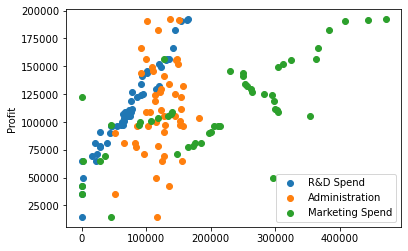

In [5]:
# checking the relationship between the features and the target variables

plt.scatter(income["R&D Spend"], income["Profit"])
plt.scatter(income["Administration"], income["Profit"])
plt.scatter(income["Marketing Spend"], income["Profit"])
plt.ylabel("Profit")
plt.legend(income)
plt.show()

In [6]:
# splitting into x and y

x = income.drop("Profit", axis=1)
y = income["Profit"]

income.shape, x.shape, y.shape

((50, 5), (50, 4), (50,))

In [7]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

##### *****how dummies works

In [9]:
new_x = x.drop("State", axis=1)
state = x["State"]

In [10]:
dummies = pd.get_dummies(state)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


##### *****

In [20]:
transformed_x = pd.get_dummies(x)
transformed_x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [24]:
# splitting into training and testing set

from sklearn.model_selection import train_test_split

np.random.seed(0) #to reuse the same values in the random selection of the values to be splitted into training and testing

X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2) 

# Am splitting the 'transformed_x' not the original x

In [27]:
income.shape, X_train.shape, y_train.shape

((50, 5), (40, 6), (40,))

In [31]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
28,66051.52,182645.56,118148.20,0,1,0
11,100671.96,91790.61,249744.55,1,0,0
10,101913.08,110594.11,229160.95,0,1,0
41,27892.92,84710.77,164470.71,0,1,0
2,153441.51,101145.55,407934.54,0,1,0


In [29]:
# trying using different models to check their performance differences

#1. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()

model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9641400102672394

In [30]:
#2. Linear Regression

from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9347068473282424

In [40]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.8879039067653898